In [3]:
#!/usr/bin/env python

import sys
import os
absFilePath = os.path.abspath('attractor_switching.py')
fileDir = os.path.dirname(absFilePath)
parentDir = os.path.dirname(fileDir)

# change working directory to the project file of codes, use parentDir else
sys.path.append(parentDir+'/src_and_example')

import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt
from pylab import figure, cm
import functions
import random
seed=50



In [4]:
######## TIME-TRACE OF NETWORK AND CONTROL #############

In [5]:
def create_plot(data,ylabel,control_start,dt,data2=None,insert_line=None):
    fs=30 #fontsize
    lw=1.5
    T=650
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25
    
    if data2 is None:
        im1=ax.plot(np.arange(0,int(T),dt),data)
        minn=-0.03
        maxx=0.035
        add=0
    else:
        im1=ax.plot(np.arange(0,int(T),dt),data2,color='lightgray',linestyle='dotted')
        ax.plot(np.arange(0,int(T),dt),data)
    ax.set_xlabel('t',size=fs)
    ax.set_ylabel(ylabel,size=fs)
    ax.set_ylim(minn-add,maxx+add)
    #ax.set_title(title,size=fs, pad=20)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axvspan(control_start, 500, facecolor='green', alpha=0.09) #to indicate control time
    if insert_line==None:
        pass
    else:
        ax.plot(np.ones(90)*insert_line,np.arange(90)-45,color='black',linewidth=lw,linestyle='dashed')

    return fig.tight_layout()



0.1 0.0 0
EULER Trace with dt  0.1


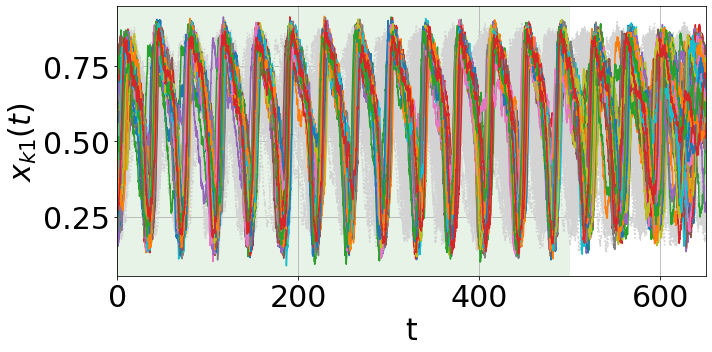

EULER Control with dt  0.1


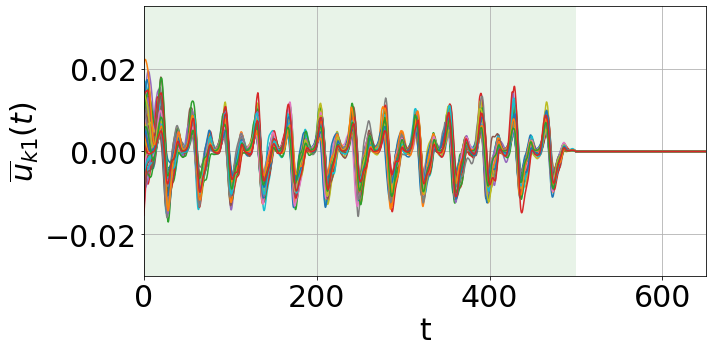

0.01 0.0 0
EULER Trace with dt  0.01


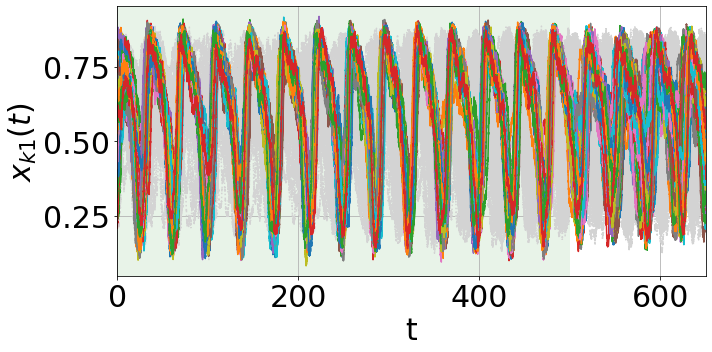

EULER Control with dt  0.01


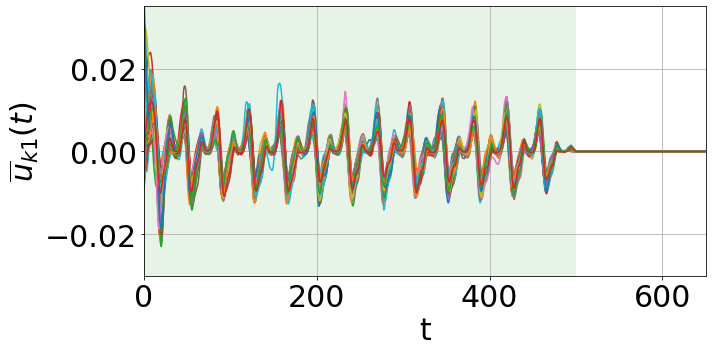

In [6]:
#make dictionary with all parameters
T=650
N=94
eta=0.024
d=2
goal='sync'
bifurcation='high'
parameters = functions.set_parameters(goal,bifurcation,parentDir)
dt_ar=np.array([0.1,0.01])
run=0.0
k=0
i=0

for e,dt in enumerate(dt_ar):

    tsteps=int(T/dt) #number of timesteps
    no_control=np.zeros((tsteps,N))#make dictionary with all parameters
    args = {
        'tsteps':tsteps,
        'dt':dt,
        'd':d,
        }

#        filename=fileDir+'/results/normalized_test_sync_euler_dt'+str(dt)+'run'+str(run)

    filename=fileDir+'/data/review_euler_dt'+str(dt)+'run'+str(run)
    with open(filename, 'rb') as pickle_file:
        data = pickle.load(pickle_file)

    print(dt, run,data['warnflag'])

    node_ic=data['node_ic']
    control=np.concatenate([data['optimal_control'],np.zeros([int(150/dt),94])])

    noise=functions.initialize_noise(eta,dt,1,tsteps,parameters['N'])
    parameters = functions.set_parameters(goal,bifurcation,parentDir)
    args['node_ic']=node_ic
    args['noise']=noise[0]

    args.update(parameters)
    state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network_noisy,control, **args)[:,0,:]
    state_uncontrolled=functions.plot_runge_kutta(functions.ODE_FHN_network_noisy,np.zeros([tsteps,N]), **args)[:,0,:]



    print('EULER Trace with dt ',dt)
    create_plot(state_controlled,'$x_{k1}(t)$',0,dt,data2=state_uncontrolled)
    plt.savefig(fileDir+'/figures/review_Trace_euler_dt_'+str(dt)+'.png', bbox_inches='tight') 
    plt.show()
    k+=1
    print('Control with dt ',dt)
    create_plot(control,'$\overline{u}_{k1}(t)$',0,dt)
    plt.savefig(fileDir+'/figures/review_Control_euler_dt_'+str(dt)+'.png', bbox_inches='tight') 
    plt.show()
    k+=1

    i+=1



In [7]:
####### PLOT MEAN NODE ENERGY OF CONTROL ###########

In [15]:
filename=fileDir+'/data/review_data'
with open(filename, 'rb') as pickle_file:
    data = pickle.load(pickle_file)
degree=data['degree']

In [16]:
def create_plot(x,y,yerror,dt_ar,xname,yname):
    fs=30

    cols=['red','blue','lightgray']
    labels=['$dt=0.1$, Runge-Kutta','$dt=0.1$, Euler-Mayurama','$dt=0.01$, Euler-Mayurama']
    sxima=['o',"^","d"]
    kwargs = dict(ecolor='k', color='k', capsize=2,
                  elinewidth=1.1, linewidth=0.6, ms=11)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

    for e,dt in enumerate(dt_ar):
        ax.errorbar(x,y[e] ,yerr=yerror[e], fmt=sxima[e], mfc=cols[e],label=labels[e], **kwargs)
    ax.set_xlabel(xname,size=fs)
    ax.set_ylabel(yname,size=fs)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.set_ylim(np.min(y)-np.max(yerror)+0.001,np.max(y)+np.max(yerror)+0.001)
#    ax.legend(loc='lower right', frameon=True,fontsize=fs)
    ax.legend(loc='upper right', ncol=1, frameon=True,fontsize=fs-12)
    #ax.set_title(bifurcation+' bifurcation',size=fs, pad=20,color='r')

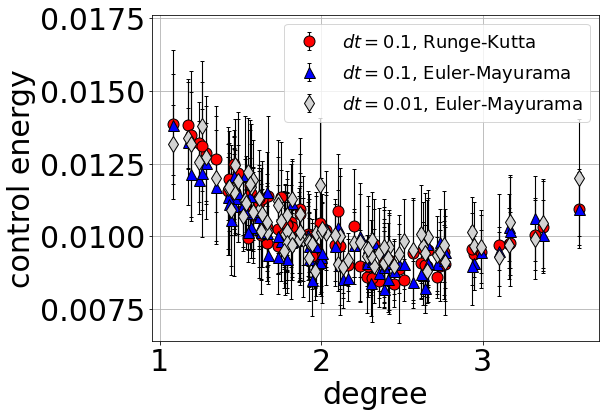

In [17]:
mean_energy=data['mean_energy']
std_energy=data['std_energy']
dt_ar=np.array([0.1,0.1,0.01])
create_plot(degree,mean_energy,std_energy,dt_ar,'degree','control energy')
plt.savefig(fileDir+'/figures/review_Control_energy.png', bbox_inches='tight') 
plt.show()


In [ ]:
    if dt=0.1:
        filename=fileDir+'/data/review_euler_dt'+str(dt)+'run'+str(run)
        with open(filename, 'rb') as pickle_file:
            data = pickle.load(pickle_file)

        print(dt, run,data['warnflag'])

        node_ic=data['node_ic']
        control=np.concatenate([data['optimal_control'],np.zeros([int(150/dt),94])])
    if dt=0.01:
        filename=fileDir+'/data/review_euler_dt'+str(dt)+'run'+str(run)+'first'
        with open(filename, 'rb') as pickle_file:
            data = pickle.load(pickle_file)
        optimal_control_first=data['optimal_control']
        filename=fileDir+'/data/review_euler_dt'+str(dt)+'run'+str(run)+'second'
        with open(filename, 'rb') as pickle_file:
            data = pickle.load(pickle_file)
        optimal_control_second=data['optimal_control']
#        print(dt, run,data['warnflag'])

        node_ic=data['node_ic']
        control=np.concatenate([optimal_control_first,optimal_control_second,np.zeros([int(150/dt),94])])
        
